## Correlation Analysis Across ETFs

In this section we calculate the pairwise correlation matrix for the historical daily log returns of the ETFs.
We then visualize the full correlation matrix as a heatmap.
Next, we extract the upper-triangular (pairwise) correlations, plot their histogram, and finally bin these correlations into low, medium, and high categories and display a count plot.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
# Define ETFs and download historical adjusted close data
etfs = ["SPY", "XLU", "IGV", "SMH", "ARKK", "XLE", "QQQ", "XLK"]
start_date = "2020-01-01"
end_date = "2024-12-31"
data = yf.download(etfs, start=start_date, end=end_date, auto_adjust=False)["Adj Close"]

[*********************100%***********************]  8 of 8 completed


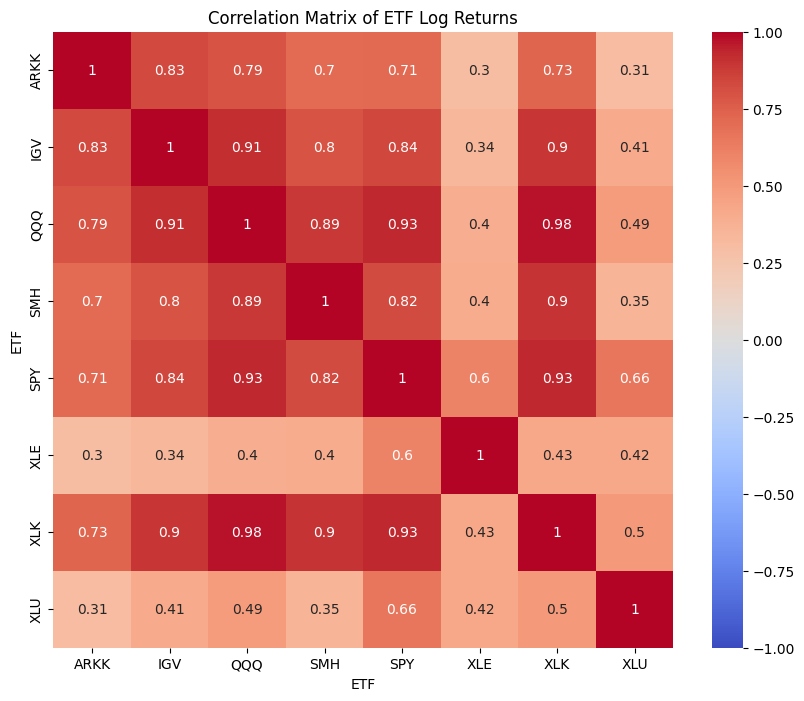

In [3]:
# Compute daily log returns if not already computed
log_returns = np.log(data / data.shift(1)).dropna()

# Compute the full correlation matrix
corr_matrix = log_returns.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ETF Log Returns")
plt.xlabel("ETF")
plt.ylabel("ETF")
plt.show()

In [14]:
# Extract pairwise correlations (upper triangular only)
mask = np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1)

# Extract pairwise correlations without relying on .reset_index()
pairwise_corr = corr_matrix.where(mask).stack()

# Force index renaming to remove the conflicting 'Ticker'
pairwise_corr.index = pairwise_corr.index.set_names(['ETF1', 'ETF2'])

# Convert to DataFrame and rename the correlation column
pairwise_corr_df = pairwise_corr.reset_index().rename(columns={0: 'Correlation'})

print("Pairwise Correlations:")
print(pairwise_corr_df)

Pairwise Correlations:
    ETF1 ETF2  Correlation
0   ARKK  IGV     0.830911
1   ARKK  QQQ     0.790011
2   ARKK  SMH     0.704328
3   ARKK  SPY     0.711246
4   ARKK  XLE     0.304068
5   ARKK  XLK     0.728939
6   ARKK  XLU     0.312426
7    IGV  QQQ     0.914637
8    IGV  SMH     0.796790
9    IGV  SPY     0.840911
10   IGV  XLE     0.338211
11   IGV  XLK     0.898136
12   IGV  XLU     0.413271
13   QQQ  SMH     0.890103
14   QQQ  SPY     0.930854
15   QQQ  XLE     0.396787
16   QQQ  XLK     0.976260
17   QQQ  XLU     0.490513
18   SMH  SPY     0.822770
19   SMH  XLE     0.399214
20   SMH  XLK     0.904073
21   SMH  XLU     0.353512
22   SPY  XLE     0.604904
23   SPY  XLK     0.932744
24   SPY  XLU     0.657890
25   XLE  XLK     0.426245
26   XLE  XLU     0.423912
27   XLK  XLU     0.497037


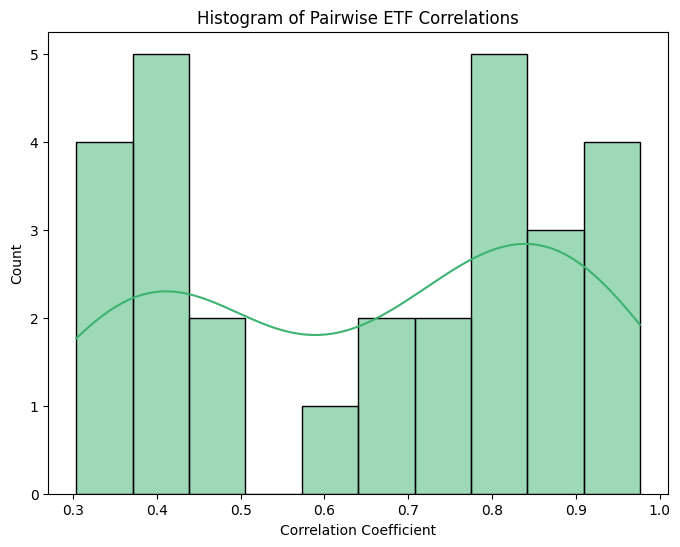

In [15]:
# Plot a histogram of the pairwise correlation coefficients
plt.figure(figsize=(8,6))
sns.histplot(pairwise_corr_df['Correlation'], bins=10, kde=True, color='mediumseagreen')
plt.title("Histogram of Pairwise ETF Correlations")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Count")
plt.show()


Binned Correlation Counts:
Corr_Bin
Low (<0.3)           0
Medium (0.3-0.7)    13
High (>0.7)         15
Name: count, dtype: int64


/var/folders/lw/9t5ytb2d3xs243fmlzf16znr0000gn/T/ipykernel_62559/162558776.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Corr_Bin', data=pairwise_corr_df, order=labels, palette='viridis')


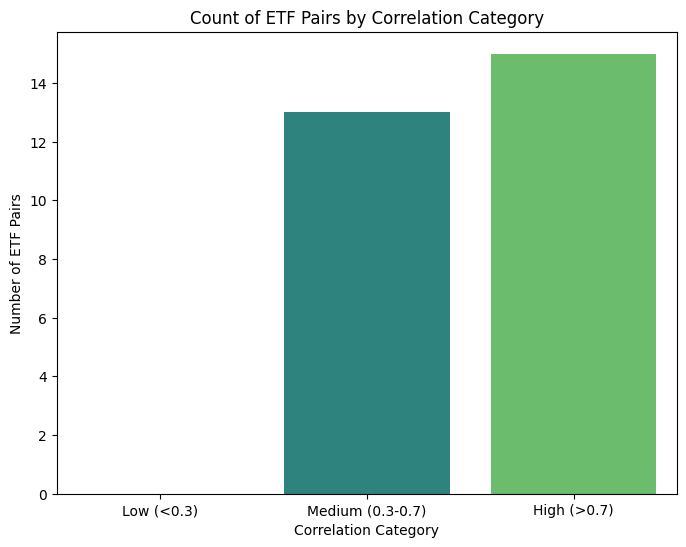

In [18]:
# Bin the correlation coefficients into three categories:
# Low: < 0.3, Medium: 0.3 to 0.7, High: > 0.7
bins = [-1, 0.3, 0.7, 1]
labels = ['Low (<0.3)', 'Medium (0.3-0.7)', 'High (>0.7)']
pairwise_corr_df['Corr_Bin'] = pd.cut(pairwise_corr_df['Correlation'], bins=bins, labels=labels)

# Display the count of each bin
bin_counts = pairwise_corr_df['Corr_Bin'].value_counts().sort_index()
print("\nBinned Correlation Counts:")
print(bin_counts)

# Plot a count plot for the binned correlations
plt.figure(figsize=(8,6))
sns.countplot(x='Corr_Bin', data=pairwise_corr_df, order=labels, palette='viridis')
plt.title("Count of ETF Pairs by Correlation Category")
plt.xlabel("Correlation Category")
plt.ylabel("Number of ETF Pairs")
plt.show()